In [3]:
import os
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family': 'Serif',
        'weight' : 'normal',
        'size'   : 15
       }
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype']= 42
matplotlib.rcParams['pdf.use14corefonts']=True
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
def generate_common_domain_file():
    with open("/home/azafar2/mobile_analysis/data/android_commons.json") as fp:
        android_file = json.load(fp)
        android_domains = list(android_file.keys())
        fp.close()

    with open("/home/azafar2/mobile_analysis/data/safari.json") as fp:
        safari_file = json.load(fp)
        safari_domains = list(safari_file.keys())
        fp.close()
    common_domains = list(set(android_domains).intersection(safari_domains))

    d = {}
    print(len(common_domains))
    for domain in common_domains:
        d[domain] = 1

    with open('/home/azafar2/mobile_analysis/data/validCommonDomains_round_4.json','w') as fp:
        json.dump(d,fp,indent=4)
        fp.close()

generate_common_domain_file()


10132


In [4]:

def generate_webapi_usage_data():
    dir = "/home/azafar2/mobile_analysis/data/api_accesses/"
    filepaths = [os.path.join(dir,x) for x in os.listdir(dir)]
    browsers = ['chrome','firefox','focus','brave','ddg','Safari']
    d = {key:0 for key in browsers}
    c = {}
    for fpath in filepaths:
        with open(fpath) as fp:
            file = json.load(fp)
            fp.close()
        browser = fpath.split("/")[-1].replace("_temp.json","")
        for i,website in enumerate(file['websites']):
            if website not in c:
                c[website] = {}
            for api in file['websites'][website]:
                if api not in c[website]:
                    c[website][api] = {}
                if browser not in c[website][api]:
                    c[website][api][browser] = file['websites'][website][api]["count"]
                d[browser] += file['websites'][website][api]["count"]

    print(d)

    with open("website_api_browser.json",'w') as fp:
        json.dump(c,fp,indent=4)
        fp.close()

# generate_webapi_usage_data()

{'chrome': 2137348, 'firefox': 2003421, 'focus': 2011011, 'brave': 1927064, 'ddg': 1179079, 'Safari': 3863679}


In [5]:
# from ftplib import FTP_PORT


def sort_dic(x):
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

dir = "/home/azafar2/mobile_analysis/data/api_accesses/"
filepaths = [os.path.join(dir,x) for x in os.listdir(dir) if 'temp' not in x]
browsers = ['chrome','firefox','focus','brave','ddg','Safari']
d = {key:{} for key in browsers}

for fpath in filepaths:
    with open(fpath) as fp:
        file = json.load(fp)
        fp.close()

for fpath in filepaths:
    with open(fpath) as fp:
        file = json.load(fp)
        fp.close()
    browser = fpath.split("/")[-1].replace(".json","")
    print(f"\n\n{browser}")
    for website in file['websites']:
        for api in file['websites'][website]:
            if api not in d[browser]:
                d[browser][api] = file['websites'][website][api]
            else:
                d[browser][api] += file['websites'][website][api]
    d[browser] = sort_dic(d[browser])

    # display top 10 api in each browser
    top_apis = list(d[browser].keys())[:10]
    for a in top_apis:
        print(f"{a}: {d[browser][a]}")

            



brave
Document.cookie: 63537
CanvasRenderingContext2D.fillRect: 54068
Math.sin: 29220
CanvasRenderingContext2D.strokeStyle: 28962
navigator.userAgent: 23746
CanvasRenderingContext2D.arc: 23493
Math.cos: 22160
CanvasRenderingContext2D.moveTo: 21726
Date.getTime: 20624
Math.imul: 16185


chrome
Math.sin: 98605
Math.cos: 90634
Math.atan2: 78783
Document.cookie: 63930
CanvasRenderingContext2D.fillRect: 49053
Math.asin: 37808
CanvasRenderingContext2D.strokeStyle: 26640
Math.acos: 25210
navigator.userAgent: 24133
Date.getTime: 20799


focus
Document.cookie: 61524
Math.sin: 37105
CanvasRenderingContext2D.strokeStyle: 32772
CanvasRenderingContext2D.arc: 31563
CanvasRenderingContext2D.moveTo: 29163
Math.cos: 23338
navigator.userAgent: 22058
Date.getTime: 20446
DeviceOrientationEvent.beta: 17593
DeviceOrientationEvent.gamma: 16887


ddg
CanvasRenderingContext2D.fillRect: 52833
Math.sin: 28972
Document.cookie: 26199
Math.cos: 23611
CanvasRenderingContext2D.strokeStyle: 16884
CanvasRenderingCont

In [63]:
df = pd.DataFrame(d)
df = df.T
for c in list(df.columns):
    for val in df[c]:
        if val < 10000:
            df.drop(c,axis=1,inplace=True)
            break
df = df.T

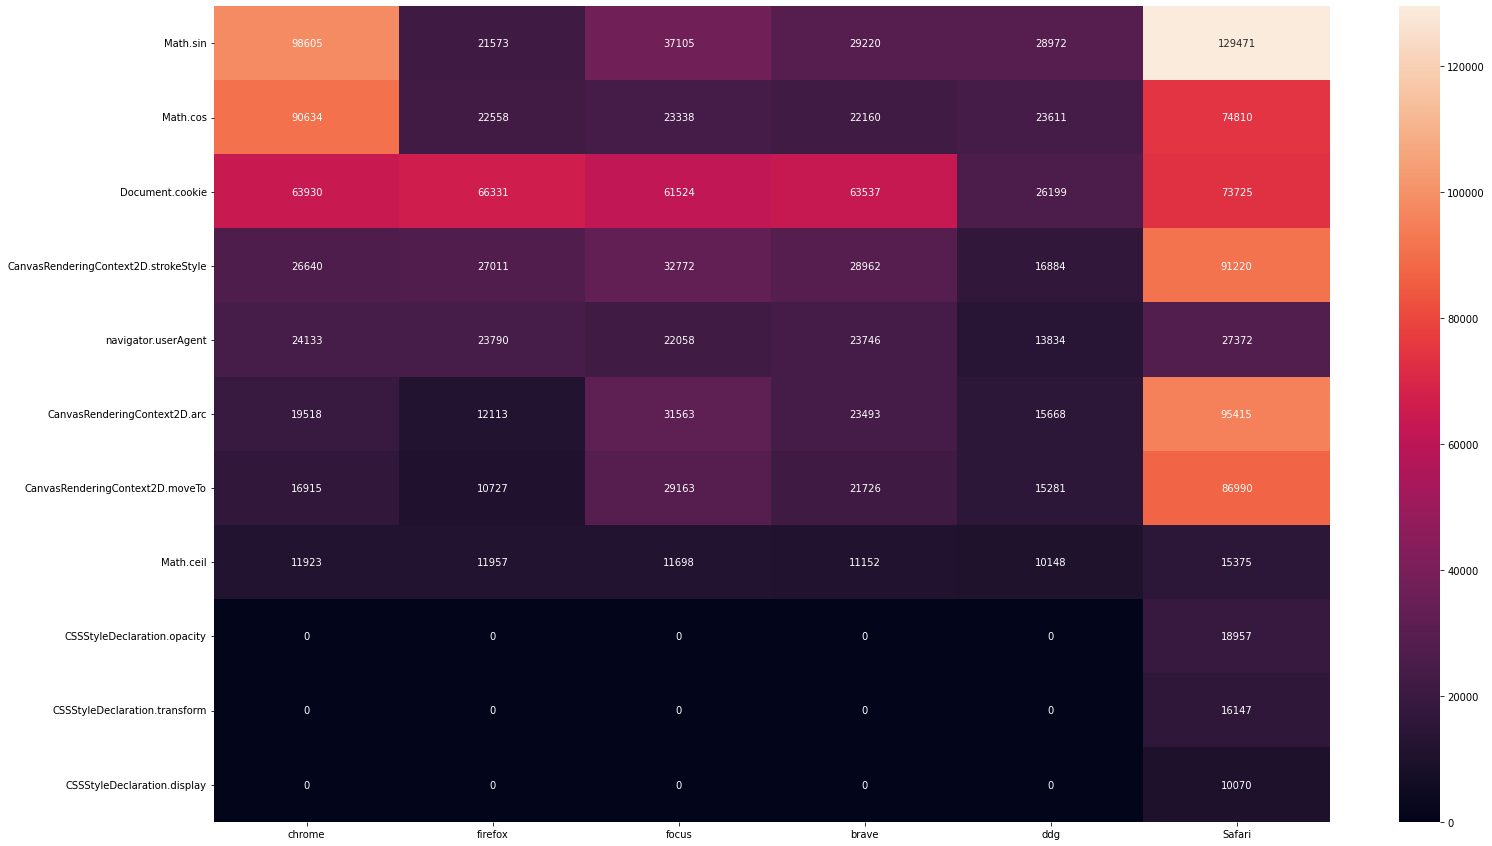

In [79]:
df = df.fillna(0)
fig = plt.figure()
# generating correlation heatmap
sns.heatmap(df, annot = True,fmt='g')
plt.rcParams["figure.figsize"] = (25,15)
# posting correlation heatmap to output console
# plt.show()
plt.savefig("api_heatmap.pdf")

In [78]:
df.fillna(0)

,chrome,firefox,focus,brave,ddg,Safari
Math.sin,98605.0,21573.0,37105.0,29220.0,28972.0,129471.0
Math.cos,90634.0,22558.0,23338.0,22160.0,23611.0,74810.0
Document.cookie,63930.0,66331.0,61524.0,63537.0,26199.0,73725.0
CanvasRenderingContext2D.strokeStyle,26640.0,27011.0,32772.0,28962.0,16884.0,91220.0
navigator.userAgent,24133.0,23790.0,22058.0,23746.0,13834.0,27372.0
CanvasRenderingContext2D.arc,19518.0,12113.0,31563.0,23493.0,15668.0,95415.0
CanvasRenderingContext2D.moveTo,16915.0,10727.0,29163.0,21726.0,15281.0,86990.0
Math.ceil,11923.0,11957.0,11698.0,11152.0,10148.0,15375.0
CSSStyleDeclaration.opacity,0.0,0.0,0.0,0.0,0.0,18957.0
CSSStyleDeclaration.transform,0.0,0.0,0.0,0.0,0.0,16147.0


### Request Count analysis

In [2]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','focus','ddg','brave','Safari']

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

for b in browsers:
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {
        "easyList": 0,
        "easyPrivacy": 0,
        "fp": 0,
        "tp":0,
    }
    for domain in file:
        for request in file[domain]:
            # if request['content_type'] != 'javascript':
            #     continue
            if request['easyList']:
                d['easyList']+= 1
            if request['easyPrivacy']:
                d['easyPrivacy']+= 1
            if request['etld+1'] == domain.replace("_round_3",""):
                d['fp']+= 1
            else:
                d['tp']+= 1
    print(f'{b} \n {d}')



total_numbers = {
    "ddg": 818912,
    "focus": 882617,
    "brave": 697409
}

chrome 
 {'easyList': 227472, 'easyPrivacy': 263238, 'fp': 428439, 'tp': 1111846}
firefox 
 {'easyList': 154577, 'easyPrivacy': 203260, 'fp': 407938, 'tp': 955042}
focus 
 {'easyList': 19080, 'easyPrivacy': 69442, 'fp': 384974, 'tp': 497823}
ddg 
 {'easyList': 10234, 'easyPrivacy': 34511, 'fp': 466187, 'tp': 352725}
brave 
 {'easyList': 914, 'easyPrivacy': 3946, 'fp': 395664, 'tp': 301745}
Safari 
 {'easyList': 140760, 'easyPrivacy': 192198, 'fp': 441365, 'tp': 855980}


### Section 3

#### Content_type

In [8]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','focus','ddg','brave','Safari']

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()
a = {}
for b in browsers:
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {}
    for domain in file:
        for request in file[domain]:
            content_type = request['content_type']
            if content_type not in d:
                d[content_type] = 1
            else:
                d[content_type] += 1
    a[b] = d


In [9]:
temp = {}
browserlist_labels = ['Chrome','Firefox','Safari','Brave','Focus','DDG']
browserlist = ['chrome','firefox','Safari','brave','focus','ddg']
for b in a:
    other = 0
    temp[b] = {}
    temp[b]['other'] = 0
    for t in a[b]:
        if t == '' or t =='other':
            temp[b]['other'] += a[b][t]
        else:
            temp[b][t] = a[b][t]

# print(temp)
new_temp = {}
for browser in browserlist:
    new_temp[browser] = temp[browser]
        
df = pd.DataFrame(new_temp)
df

,chrome,firefox,Safari,brave,focus,ddg
other,213988,135754,110662,38404,48121,42512
text/html,166959,124185,105845,38626,49619,67218
css,68354,66904,65814,63040,60983,64169
javascript,342680,345762,335342,178084,226269,195424
image,531066,421078,477316,299114,294485,352287
font,32106,40616,38883,30543,34159,31172
json,93803,149459,87318,30593,120663,40387
plain,61418,43238,44698,4867,13569,10718
octet-stream,12475,28884,12780,8881,30202,9316
xml,9874,2576,7431,1038,967,1033


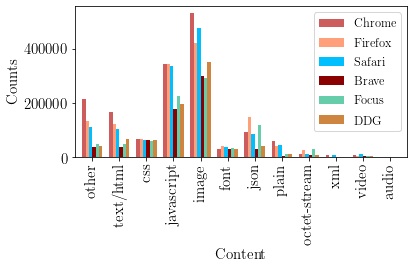

In [10]:
colors = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']
fig = df.plot(kind='bar',width=0.75,color = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']).get_figure()
# plt.grid(True)
plt.xlabel("Content")
plt.ylabel("Counts")
plt.legend(fontsize='small',labels=browserlist_labels)
plt.tight_layout()
fig.savefig('./../plots/content_type.pdf')

#### Fp/Tp distribution

In [58]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','Safari','brave','focus','ddg']


def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

a = {}

for b in browsers:
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {
        "fp": {},
        "tp":{},
    }
    for domain in file:
        for request in file[domain]:
            req_domain = request['etld+1']
            if req_domain == domain.replace("_round_3",""):
                if req_domain not in d['fp']:
                    d['fp'][req_domain] = 1
                else:
                    d['fp'][req_domain] += 1
            else:
                if req_domain not in d['tp']:
                    d['tp'][req_domain] = 1
                else:
                    d['tp'][req_domain] += 1
    d['fp'] = sort_dictionary(d['fp'])
    d['tp'] = sort_dictionary(d['tp'])
    a[b] = d
    
with open("tp_requests.json",'w') as fp:
    json.dump(a,fp,indent=4)
    fp.close()

In [59]:
# a['brave']['tp']

In [60]:


browsers = ['Chrome','Firefox','Safari','Brave','Focus','DDG']
fp = [428439,407938,384974,466187,395664,441365]
tp = [1111846,955042,497823,352725,301745,855980]
# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
d = {'First Party':fp,'Third Party':tp}
df2 = pd.DataFrame(d,index=browsers)


In [61]:
df2

,First Party,Third Party
Chrome,428439,1111846
Firefox,407938,955042
Safari,384974,497823
Brave,466187,352725
Focus,395664,301745
DDG,441365,855980


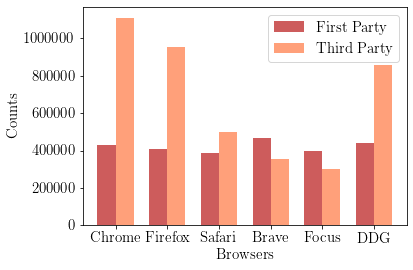

In [62]:
# df2.plot(kind='bar')
colors = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']
# fig = df2.plot(kind='bar').get_figure()
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
x_axis = np.arange(len(browsers))
width = 0.35
plt.bar(x_axis - width/2, fp,width,label="First Party",color=['indianred','indianred','indianred','indianred','indianred','indianred'])
plt.bar(x_axis + width/2, tp,width,label="Third Party",color=['lightsalmon','lightsalmon','lightsalmon','lightsalmon','lightsalmon','lightsalmon'])
plt.xticks(x_axis,browsers)
plt.xlabel("Browsers")
plt.ylabel("Counts")
ax.legend()
# plt.grid(True)
plt.tight_layout()
fig.savefig('./../plots/fp_tp_distribution.pdf')


Number of domains where DDG had the highest request count

In [101]:
with open("tp_requests.json") as fp:
    file = json.load(fp)

high_count = 0
for domain in file['ddg']['fp']:
    indicator = 0
    ddg_count = file['ddg']['fp'][domain]
    others = []
    for browser in file:
        if browser == 'ddg':
            continue
        if domain in file[browser]['fp']:
            others.append(file[browser]['fp'][domain])
        else:
            indicator = -1
    for val in others:
        if val > ddg_count:
            indicator = -1
    if indicator == -1:
        continue
    else:
        high_count += 1

print(high_count)
        
    

7189


Statistical variance of first party requests

In [109]:
with open("tp_requests.json") as fp:
    file = json.load(fp)
for browser in file:
    fp = []
    for domain in file[browser]['fp']:
        fp.append(file[browser]['fp'][domain])
    df = pd.DataFrame(fp)
    print(browser,np.std(fp))
    

chrome 44.13895930647081
firefox 44.13489374165168
focus 38.85174371186141
ddg 45.784934515004444
brave 41.74719306440047
Safari 44.33045210986108


Count of first party contents across browsers

In [6]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','focus','ddg','brave','Safari']

ddg_set = set()
other_set = set()
with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()
a = {}
for b in browsers:
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {}
    for domain in file:
        for request in file[domain]:
            req_domain = request['etld+1']
            if req_domain == domain.replace("_round_3",""):
                content_type = request['content_type']
                if b == "ddg":
                    ddg_set.add(request['url'])
                else:
                    other_set.add(request['url'])
                if content_type not in d:
                    d[content_type] = 1
                else:
                    d[content_type] += 1
    a[b] = d


In [7]:
temp = {}
for b in a:
    other = 0
    temp[b] = {}
    temp[b]['other'] = 0
    for t in a[b]:
        if t == '' or t =='other':
            temp[b]['other'] += a[b][t]
        else:
            temp[b][t] = a[b][t]

# print(temp)
        
df = pd.DataFrame(temp)
df

,chrome,firefox,focus,ddg,brave,Safari
other,20475,20964,19383,22976,18172,18758
text/html,31684,30428,29482,49349,26796,29999
image,197984,182484,173066,219711,185985,221115
json,18340,18143,17336,16318,15784,16892
javascript,97529,94664,87751,96824,90111,92034
plain,4765,4904,4692,3833,2541,4568
css,37963,36724,34634,37963,36759,36123
octet-stream,4980,5080,4822,4752,4995,5507
font,12503,13070,12396,12483,12368,13426
xml,677,293,273,402,678,308


#### Third-party cookies

In [56]:
filedir = '/home/azafar2/mobile_analysis/data/cookie_info/'
browsers = ['chrome','firefox','Safari','brave','focus','ddg']


def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp

# def change_browser_tags(a):
#     temp = a
#     for browser in a:
#         pokemon
with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

a_fp = {}
a_tp = {}


# First Party and Third Party Cookie Numbers
for b in browsers:
    fp_arr = []
    tp_arr = []
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {
        "fp": 1,
        "tp":1,
    }
    
    for domain in file:
        tp_count,fp_count = 0,0
        for entity in file[domain]:
            if entity == '':
                continue # empty domains will not be considered
            else:
                if entity == domain:
                    fp_count+=file[domain][entity]
                else:
                    tp_count+= file[domain][entity]
        fp_arr.append(fp_count)
        tp_arr.append(tp_count)
        fp_arr.sort()
        tp_arr.sort()
    a_fp[b] = fp_arr
    a_tp[b] = tp_arr

# c = {}
# browserlist_labels = ['Chrome','Firefox','Safari','Brave','Focus','DDG']
# browserlist = ['chrome','firefox','Safari','brave','focus','ddg']
# for browser in browserlist:
#     c[browser]

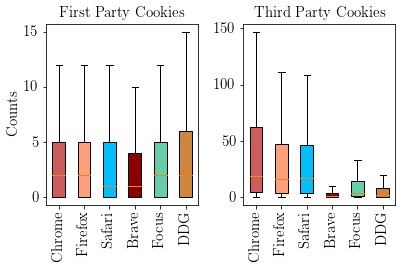

In [57]:

# ref https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['Chrome','Firefox','Safari','Brave','Focus','DDG']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# rectangular box plot
bplot1 = ax1.boxplot(a_fp.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels,
                     showfliers=False)  # will be used to label x-ticks
ax1.set_title('First Party Cookies')

# notch shape box plot
bplot2 = ax2.boxplot(a_tp.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels,
                     showfliers=False)  # will be used to label x-ticks
ax2.set_title('Third Party Cookies')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen','tomato','goldenrod','cyan']
colors = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1,ax2]:
    # ax.yaxis.grid(True)
    ax.set_xticklabels(rotation=90,labels=labels)
    # ax.set_xlabel('Three separate samples')
ax1.set_ylabel('Counts')
plt.tight_layout()
plt.show()
fig.savefig('./../plots/cookies_box.pdf')

In [28]:
df = pd.DataFrame(a_fp)
print(df['chrome'].value_counts().describe())
# print(df['firefox'].value_counts().describe())
# print(df['focus'].value_counts().describe())
# print(df['ddg'].value_counts().describe())

count    124.000
mean      81.024
std      347.397
min        1.000
25%        2.000
50%        5.000
75%       18.500
max     3116.000
Name: chrome, dtype: float64


In [29]:
# Total domains that set the highest number of third party cookies
a = {}

for b in browsers:
    fp_arr = []
    tp_arr = []
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    d = {}
    
    for domain in file:
        for entity in file[domain]:
            if entity == '':
                continue # empty domains will not be considered
            else:
                if entity == domain:
                    continue
                else:
                    if entity in d:
                        d[entity] += 1
                    else:
                        d[entity] = 1
    d = sort_dictionary(d)
    a[b] = d
        

In [36]:
a['Safari']

{'google-analytics.com': 5356,
 'doubleclick.net': 4400,
 'googletagmanager.com': 3520,
 'facebook.com': 3159,
 'facebook.net': 2349,
 'linkedin.com': 1522,
 'bing.com': 1472,
 'adsrvr.org': 1393,
 'adnxs.com': 1319,
 'twitter.com': 1155,
 't.co': 1146,
 'demdex.net': 1115,
 'rubiconproject.com': 1071,
 'scorecardresearch.com': 1046,
 'clarity.ms': 887,
 'amazon-adsystem.com': 849,
 'rlcdn.com': 818,
 'criteo.com': 811,
 'hotjar.com': 807,
 'yahoo.com': 779,
 'cookielaw.org': 774,
 'youtube.com': 723,
 'nr-data.net': 717,
 'quantserve.com': 704,
 'openx.net': 704,
 'google.com': 676,
 'bidswitch.net': 656,
 'pubmatic.com': 631,
 'id5-sync.com': 522,
 'everesttech.net': 514,
 'crwdcntrl.net': 502,
 'smartadserver.com': 487,
 'criteo.net': 478,
 'casalemedia.com': 474,
 'yandex.ru': 465,
 'taboola.com': 457,
 'tapad.com': 438,
 '3lift.com': 434,
 'lijit.com': 433,
 'liadm.com': 429,
 'yandex.com': 423,
 'tiktok.com': 416,
 'contextweb.com': 393,
 'bluekai.com': 385,
 '.': 377,
 'hubspot.

### Section 4

1. Should be blocked requests from EasyList, EasyPrivacy based on rule match
2. Domain name match for request servers based on Disconnect and WhoTracksMe tracker list


#### EasyList

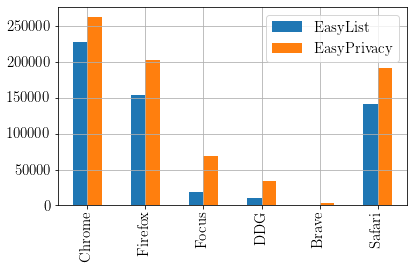

In [2]:


easylist = [227472,154577,19080,10234,914,140760]
easyprivacy = [263238,203260,69442,34511,3946,192198]
browsers = ['Chrome','Firefox','Focus','DDG','Brave','Safari']

d = {'EasyList':easylist,'EasyPrivacy':easyprivacy}
df2 = pd.DataFrame(d,index=browsers)



fig = df2.plot(kind='bar').get_figure()
plt.grid(True)
plt.tight_layout()
fig.savefig('./../plots/el_ep_distribution.pdf')


Top Domains that should have been blocked (EasyList and EasyPrivacy)

In [97]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','focus','ddg','brave','Safari']

# total_number_of_requests = {}

def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

def get_easy_domains():
    easylist = {}
    easyprivacy = {}

    for b in browsers:
        total_number_of_requests[b] = 0
        print(b)
        filepath = os.path.join(filedir,b+".json")
        with open(filepath) as fp:
            file = json.load(fp)
            fp.close()
        

        _easylist = {}
        _easyprivacy = {}
        
        for domain in file:
            for request in file[domain]:
                total_number_of_requests[b] += 1  
                req_domain = request['etld+1']
                if request['easyList']:
                    if req_domain not in _easylist:
                        _easylist[req_domain] = 1
                    else:
                        _easylist[req_domain] += 1
                        
                if request['easyPrivacy']:
                    if req_domain not in _easyprivacy:
                        _easyprivacy[req_domain] = 1
                    else:
                        _easyprivacy[req_domain] += 1
        
                
        _easyprivacy = sort_dictionary(_easyprivacy)    
        _easylist = sort_dictionary(_easylist)
        easylist[b] = _easylist
        easyprivacy[b] = _easyprivacy

    return easylist,easyprivacy

# easylist,easyprivacy = get_easy_domains()

def print_top(easy, top=20):
    for browser in easy:
        print(browser)
        for i,x in enumerate(easy[browser]):
            if i == top:
                break
            print(x,':', easy[browser][x])
            # print(x,end=',')
        print('\n')

print_top(easyprivacy,top=10)

# print(easylist.keys())
                
# for browser in easyprivacy:
#     total = 0
#     for domain in easyprivacy[browser]:
#         total += easyprivacy[browser][domain]
#     print(f"{browser}: {((total)/total_number_of_requests[browser])*100}")
    


chrome
google-analytics.com : 27270
doubleclick.net : 19208
googletagmanager.com : 14937
bidswitch.net : 10087
facebook.com : 9604
google.com : 8396
taboola.com : 7740
demdex.net : 6886
yahoo.com : 6737
bing.com : 6093


firefox
google-analytics.com : 26430
googletagmanager.com : 14597
google.com : 9616
facebook.com : 9360
doubleclick.net : 7834
bing.com : 5718
demdex.net : 5464
taboola.com : 4937
bidswitch.net : 4202
yandex.com : 3901


focus
googletagmanager.com : 13728
google.com : 4140
bing.com : 3983
6sc.co : 2395
tiktok.com : 1899
snapchat.com : 1436
sentry.io : 1195
youtube.com : 960
pinterest.com : 880
baidu.com : 753


ddg
google.com : 1492
bing.com : 1131
youtube.com : 975
sentry.io : 824
baidu.com : 804
adobedtm.com : 730
brightcove.com : 605
cloudfront.net : 563
vimeocdn.com : 558
microsoft.com : 549


brave
facebook.net : 1008
omtrdc.net : 242
amazon.com : 195
yandex.ru : 140
googletagmanager.com : 109
google-analytics.com : 101
twitter.com : 59
facebook.com : 47
amazon.sg

#### Disconnect

In [39]:
with open("/home/azafar2/mobile_analysis/Supplementary/disconnect.json") as fp:
    disconnect = json.load(fp)
    fp.close()

disconnect_cat = ['Email', 'EmailAggressive', 'Advertising', 'Content', 'Analytics', 'FingerprintingInvasive', 'FingerprintingGeneral', 'Social', 'Cryptomining', 'Disconnect']

disc = {}
for cat in disconnect['categories']:
    for service in disconnect['categories'][cat]:
        for service_name in service:
            for url in service[service_name]:
                for domain in service[service_name][url]:
                    if domain not in disc:
                        disc[domain] = [cat]
                    else:
                        disc[domain].append(cat)

# print(disc.keys())


filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','focus','ddg','brave','Safari']


def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

a = {}

for b in browsers:
    print(b)
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    

    d = {}
    
    for domain in file:
        for request in file[domain]:
            req_domain = request['etld+1']
            if req_domain in disc:
                for cat in disc[req_domain]:
                    if cat not in d:
                        d[cat] = 1
                    else:
                        d[cat] += 1
            # for domain in disc:
            #     if req_domain in domain:
            #         for cat in disc[domain]:
            #             if cat not in d:
            #                 d[cat] = 1
            #             else:
            #                 d[cat] += 1
    
    a[b] = d

chrome
firefox
focus
ddg
brave
Safari


In [4]:
df3 = pd.DataFrame(a)

In [5]:
df3

,chrome,firefox,focus,ddg,brave,Safari
Email,119208,91745,661,757,683,90456
FingerprintingGeneral,215002,161982,1329,3064,5273,161706
Disconnect,157087,136927,594,5709,9795,147268
Content,143961,128718,74758,73269,58166,124526
Advertising,359649,187710,9341,14837,8125,145937
Analytics,54282,45835,4502,5700,3212,46287
Social,14305,12143,978,964,1251,10045
FingerprintingInvasive,9098,7516,2732,1524,804,8902
EmailAggressive,3151,2530,1929,1851,1433,3226


#### WhoTracksMe

In [4]:
import tldextract

with open("/home/azafar2/mobile_analysis/Supplementary/whotracksme.json") as fp:
    whotracksme = json.load(fp)
    fp.close()

def get_tldextract(url_str):
    try:
        extracted_obj = tldextract.extract(url_str)
        res = extracted_obj.domain + "." + extracted_obj.suffix
        return res
    except:
        return ''

cat = whotracksme['categories']
disc = {}
for tracker in whotracksme['trackers']:
    url = whotracksme['trackers'][tracker]['url']
    url = get_tldextract(url)
    cate = whotracksme['trackers'][tracker]['categoryId']
    cate = cat[str(cate)]
    if url not in disc:
        disc[url] = cate
    else:
        disc[url] = cate

In [5]:
filedir = '/home/azafar2/mobile_analysis/data/should_be_blocked_round_3/'
browsers = ['chrome','firefox','Safari','brave','focus','ddg']




def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp

with open('/home/azafar2/mobile_analysis/data/browser_specific_requests.json') as fp:
    browser_specific_results = json.load(fp)
    fp.close()

a = {}

for b in browsers:
    print(b)
    filepath = os.path.join(filedir,b+".json")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    

    d = {}
    
    for domain in file:
        for request in file[domain]:
            req_domain = request['etld+1']
            if req_domain in disc:
                cat = disc[req_domain]
                if cat not in d:
                    d[cat] = 1
                else:
                    d[cat] += 1

                    
    a[b] = d

chrome
firefox
Safari
brave
focus
ddg


In [6]:
new_cats = ['advertising','site_analytics','social_media','customer_interaction','audio_video_player','essential']
temp = {}
for browser in a:
    # if browser in ['chrome','Safari','firefox']:
    #     continue
    temp[browser] = {}
    for cat in a[browser]:
        if cat not in new_cats:
            # temp[browser][cat.replace("_"," ")] = a[browser][cat]
            continue
        else:
            temp[browser][cat.replace("_"," ")] = a[browser][cat]

In [7]:
df3 = pd.DataFrame(temp)
df3


,chrome,firefox,Safari,brave,focus,ddg
advertising,183917,100960,89257,8881,18339,15876
site analytics,41196,41035,38940,10077,19075,17009
social media,16444,14079,12373,4010,2529,3838
essential,16201,15641,14811,10340,14329,11282
customer interaction,25491,23621,22349,12024,15991,14685
audio video player,3923,3579,3812,1763,2580,3098


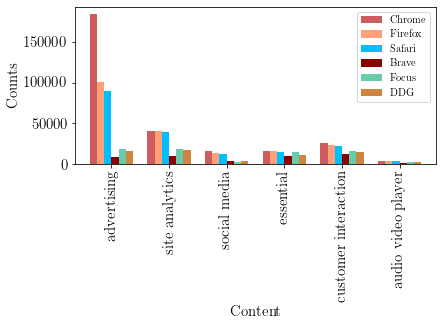

In [17]:
colors = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']
fig = df3.plot(kind='bar',width=0.75,colors=colors).get_figure()
# plt.grid(True)
plt.xlabel("Content")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.legend(fontsize='x-small',ncol=1,labels=['Chrome','Firefox','Safari','Brave','Focus','DDG'])
fig.set_size_inches(6.4,4.8)
plt.tight_layout()
fig.savefig('./../plots/whotracksme.pdf')

### Section 5

### API Usage dissimilarity

Show through agglomerative clustering

In [2]:
filedir = "/home/azafar2/mobile_analysis/data/api_accesses/"
files = [os.path.join(filedir,x) for x in os.listdir(filedir) if "temp" not in x]

# create a superset of all the APIs that were ever executed in any browser
superset = set()

for filepath in files:
    browser = filepath.split("/")[-1].split("_")[0].replace(".json","")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    for website in file['websites']:
        for api in file['websites'][website]:
            if api not in superset:
                superset.add(api)
    


In [3]:
# populate the data object for clustering
a = {}
browsers = ["chrome","firefox","focus","brave","ddg","Safari"]
for browser in browsers:
    a[browser] = {}
    for api in superset:
        a[browser][api] = 0

for filepath in files:
    browser = filepath.split("/")[-1].split("_")[0].replace(".json","")
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    
    for website in file['websites']:
        for api in file['websites'][website]:
            count = file['websites'][website][api]['count']
            a[browser][api] += count


data_arr = []
for browser in a:
    data_arr.append(list(a[browser].values()))


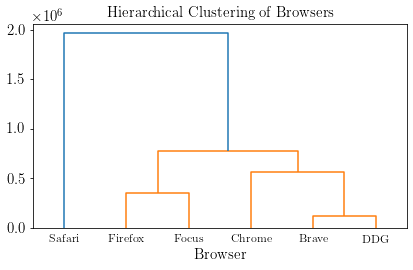

<Figure size 432x288 with 0 Axes>

In [46]:
X = data_arr

phone_labels=['iOS','Android']
browser_labels = ['Chrome', 'Firefox', 'Focus', 'Brave', 'DDG', 'Safari']
# ref https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,labels=browser_labels, **kwargs)


# iris = load_iris()
# X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering of Browsers")
plt.xlabel("Browser")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.tight_layout()
plt.show()
plt.savefig('./../plots/hierarchical_cluster_api_usage.pdf')


### API Usage dissimilarity (Generic)

Simple Counts

In [2]:
# API Categorization
# Automation detection: https://github.com/glefait/detect-selenium/blob/master/html/index.html
cate = {
    "HTMLCanvasElement": "Canvas",
    "screen": "Screen",
    "DeviceMotionEvent":"Motion",
    "Accelerometer":"Motion",
    "Gyroscope":"Motion",
    "LinearAccelerationSensor":"Motion",
    "BatteryManager":"Battery",
    "localStorage": "Storage",
    "sessionStorage,": "Storage",
    "indexedDB": "Storage",
    #Audio
    "AudioContext":"Audio",
    "OfflineAudioContext,":"Audio",
    "OscillatorNode,":"Audio",
    "ScriptProcessorNode":"Audio",
    "AnalyserNode,":"Audio",
    "GainNode":"Audio",
    "BaseAudioContext": "Audio",
    "RTCPeerConnection": "WebRTC",
    #Automation
    "navigator.webdriver":"Automation",
    "chrome.app":"Automation",
    "document.cdc_asdjflasutopfhvcZLmcfl_":"Automation",
    "document.__webdriver_script_fn":"Automation",
    "document.__driver_evaluate":"Automation",
    "document.__webdriver_evaluate":"Automation",
    "document.__fxdriver_evaluate":"Automation",
    "document.__driver_unwrapped":"Automation",
    "document.__webdriver_unwrapped":"Automation",
    "document.__fxdriver_unwrapped":"Automation",
    "document.__webdriver_script_func":"Automation",
    "navigator.webdriver":"Automation",
    "WebGLRenderingContext":"WebGL",
    "WebGL":"WebGL",
    "navigator.plugin":"Plugin",
    "CSSStyleDeclaration.font":"CSS font",
    "CSS2Properties.font":"CSS font",
    "CSSStyleDeclaration.fontSize": "CSS font",
    "CSSStyleDeclaration.fontFamily": "CSS font",
    "screen.orientation":"Orientation",
    "DeviceOrientationEvent":"Orientation",
    "AbsoluteOrientationSensor":"Orientation",
    "RelativeOrientationSensor":"Orientation",
    "navigator.platform":"Configuration",
    "navigator.userAgent":"Configuration",
    "navigator.appCodeName":"Configuration",
    "navigator.appName":"Configuration",
    "navigator.appVersion":"Configuration",
    "navigator.maxTouchPoints":"Configuration",
}


In [3]:
filedir = "/home/azafar2/mobile_analysis/data/api_accesses/"
files = [os.path.join(filedir,x) for x in os.listdir(filedir) if "temp" not in x]
browsers = ['chrome','firefox','Safari','brave','focus','ddg']
browserlist_lascbels = ['Chrome','Firefox','Safari','Brave','Focus','DDG']

# browsers = ["chrome","firefox","focus","brave","ddg","Safari"]

a = {}

for filepath in files:
    browser = filepath.split("/")[-1].split("_")[0].replace(".json","")
    print(browser)
    a[browser] = {}
    with open(filepath) as fp:
        file = json.load(fp)
        fp.close()
    for website in file['websites']:
        for api in file['websites'][website]:
            for cat in cate:
                if cat in api:
                    _cat = cate[cat]
                    if _cat not in a[browser]:
                        a[browser][_cat] = 1
                    else:
                        a[browser][_cat] += 1

brave
chrome
focus
ddg
Safari
firefox


In [7]:
df = pd.DataFrame(a)
order = ['Configuration','Storage','Screen','Plugin','Automation','Canvas','WebGL','CSS font','Orientation','Motion','Battery','Audio','WebRTC']
df = df.reindex(order)
df = df.iloc[:,[1,5,4,0,2,3]]
df
colors = ['indianred', 'lightsalmon', 'deepskyblue','darkred','mediumaquamarine','peru']


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


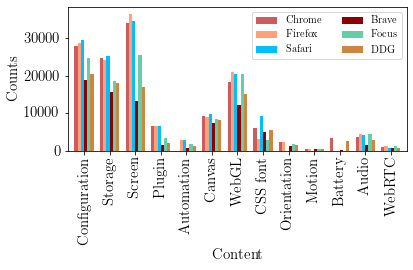

In [8]:
# df = pd.DataFrame({"Chrome":a['chrome'],"Brave":a['brave'],"Focus":a['focus'],'DDG':a['ddg']})
# df = pd.DataFrame({"Chrome":a['chrome'],"Firefox":a['firefox'],"Safari":a['Safari'],"Brave":a['brave'],"Focus":a['focus'],'DDG':a['ddg']})
fig = df.plot(kind='bar',width=0.75,colors=colors).get_figure()
# plt.grid(axis='y')
plt.xlabel("Content")
plt.ylabel("Counts")
plt.legend(fontsize='x-small',ncol=2,labels=browserlist_lascbels)
# plt.legend(fontsize='x-small')
plt.tight_layout()
fig.savefig('./../plots/API_usage_privacy.pdf')

### Steven's Heuristics

The Heuristics (from fp-inspect) define some routines used to identify fingerprinting scripts. These routines are based on categories of objects that can be used to profile users. The following heuristics will be used 

1. WebRTC Fingerprinting
2. Audio Fingerprinting
3. Canvas Based Font Fingerprinting
4. Canvas Fingerprinting

Each of these routines will take as input a dictionary associated with a browser domain that was crawled and will contain as keys the various scripts that were loaded in that domain crawl. For each of the scripts, it will traverse the apis that were called and apply the heuristics to confirm if the relevant fingerprinting approach is potentially being used or not. 

It will return as output a dictionary that contains as keys the scripts_filename and the values are going to contain boolean values that confirm whether the associated fingerprinting technique was potentially used or not.

In [18]:
def per_script_api_usage():
    browsers = ['chrome']
    filedir = "/home/azafar2/mobile_analysis/data/api_accesses/"
    files = [os.path.join(filedir,x) for x in os.listdir(filedir) if "temp" in x]
    browsers = ["chrome","firefox","focus","brave","ddg","Safari"]

    a = {}

    for filepath in files:
        browser = filepath.split("/")[-1].split("_")[0].replace(".json","")
        a[browser] = {}
        print(browser)
        a[browser] = {}
        with open(filepath) as fp:
            file = json.load(fp)
            fp.close()
        for website in file['websites']:
            a[browser][website] = {}
            for api in file['websites'][website]:
                for f in file['websites'][website][api]['files']:
                    if f not in a[browser][website]:
                        a[browser][website][f] = {api:1}
                    else:
                        if api not in a[browser][website][f]:
                            a[browser][website][f][api] = 1
                        else:
                            a[browser][website][f][api] += 1

    return a
# a = per_script_api_usage()

# with open("/home/azafar2/mobile_analysis/data/per_script_api_usage_round_3.json",'w') as fp:
#     json.dump(a,fp,indent=4)
#     fp.close()
    
# with open("/home/azafar2/mobile_analysis/data/per_script_api_usage_roudn_3.json") as fp:
#     a = json.load(fp)
#     fp.close()


brave
Safari
ddg
chrome
focus
firefox


##### Math Fingerprinting

In [7]:
math_routines = {
    "Math.acos",
    "Math.acosh",
    "Math.acoshPf",
    "Math.asin",
    "Math.asinh",
    "Math.cosh",
    "Math.coshPf",
    "Math.expm1",
    "Math.expm1Pf",
    "Math.sinh",
    "Math.sinhPf",
    "Math.tan",
    "Math.exp",
}

In [50]:
# def get_math_fp(script_apis_count):
#     api_set = set(script_apis_count.keys())
#     for routine in math_routines:
#         if routine not in api_set:
#             return False
#     return True
def get_math_fp(script_apis_count):
    count = 0
    api_set = set(script_apis_count.keys())
    for routine in api_set:
        if 'Math' in routine:
            count += script_apis_count[routine]
    return count > 100

##### WebRTC Fingerprinting

In [9]:
def get_webrtc_fp(script_apis_count):
    api_set = set(script_apis_count.keys())
    creates_channel = "RTCPeerConnection.createDataChannel" in api_set and "RTCPeerConnection.createOffer" in api_set
    can_access_candidates = "RTCPeerConnection.onicecandidate" in api_set or "RTCPeerConnection.localDescription" in api_set
    return creates_channel and can_access_candidates


##### Audio Fingerprinting

In [10]:
AUDIO_CONTEXT_FUNCS = {
    "BaseAudioContext.createOscillator",
    "BaseAudioContext.createDynamicsCompressor",
    "BaseAudioContext.destination",
    "OfflineAudioContext.startRendering",
    "OfflineAudioContext.oncomplete"
}

def get_audio_fp(script_apis_count):
    api_set = set(script_apis_count.keys())
    for prop in AUDIO_CONTEXT_FUNCS:
        if prop not in api_set:
            return False
    return True
    

##### Canvas Based Font Fingerprinting

In [11]:
def get_canvas_font_fp(script_apis_count):
    fonts_count,num_measured = 0,0
    if "CanvasRenderingContext2D.font" in script_apis_count:
        fonts_count = script_apis_count['CanvasRenderingContext2D.font']
    if "CanvasRenderingContext2D.measureText" in script_apis_count:
        num_measured = script_apis_count['CanvasRenderingContext2D.measureText']
    return fonts_count + num_measured > 50

##### Canvas Fingerprinting

In [12]:
def get_canvas(script_apis_count):
    api_set = set(script_apis_count.keys())
    text_written = "CanvasRenderingContext2D.fillText" in api_set or "CanvasRenderingContext2D.strokeText" in api_set
    styles = "CanvasRenderingContext2D.fillStyle" in api_set or "CanvasRenderingContext2D.strokeStyle" in api_set

    if not text_written or not styles:
        return False
    
    calls_toDataURL = "HTMLCanvasElement.toDataURL" in api_set
    calls_save = "CanvasRenderingContext2D.save" in api_set
    calls_restore = "CanvasRenderingContext2D.restore" in api_set
    calls_addEventListener = 'HTMLCanvasElement.addEventListener' in api_set
    
    if not calls_toDataURL or calls_save or calls_restore or calls_addEventListener:
        return False
    return True

##### Processing Heuristic Numbers across Dataset

In [19]:
with open("/home/azafar2/mobile_analysis/data/per_script_api_usage_round_3.json") as fp:
    a = json.load(fp)
    fp.close()

In [51]:
h = {}
for browser in a:
    # if browser != "chrome":
    #     continue
    h[browser] = {}
    for website in a[browser]:
        h[browser][website] = {}
        for script in a[browser][website]:
            script_apis_count = a[browser][website][script]
            canvas_fp = get_canvas(script_apis_count)
            canvas_font_fp = get_canvas_font_fp(script_apis_count)
            audio_fp = get_audio_fp(script_apis_count)
            webrtc_fp = get_webrtc_fp(script_apis_count)
            math_fp = get_math_fp(script_apis_count)
            h[browser][website][script] = {
                "Audio": audio_fp,
                "WebRTC": webrtc_fp,
                "Canvas": canvas_fp,
                "Canvas Font": canvas_font_fp,
                "Math": math_fp
            }

Number of unique scripts potentially fingerprinting

In [52]:
# Number of scripts (unique) following to fingerprinting routine
x = {}
for browser in h:
    x[browser] = {}
    for website in h[browser]:
        for script in h[browser][website]:
            for heuristic in h[browser][website][script]:
                if heuristic not in x[browser]:
                    x[browser][heuristic] = set()
                if h[browser][website][script][heuristic]:
                    x[browser][heuristic].add(script)

# compute the numbers
for browser in x:
    for heuristic in x[browser]:
        x[browser][heuristic] = len(x[browser][heuristic])
                    


In [53]:
df = pd.DataFrame(x)
df

,brave,Safari,ddg,chrome,focus,firefox
Audio,100,204,152,192,218,214
WebRTC,49,58,61,66,64,66
Canvas,458,834,773,844,1012,1031
Canvas Font,54,56,51,42,49,47
Math,643,1044,792,951,800,934


Number of Tranco websites where fingerprinting occurred

In [54]:
# Number of scripts (unique) following to fingerprinting routine
x = {}
for browser in h:
    x[browser] = {}
    for website in h[browser]:
        for script in h[browser][website]:
            for heuristic in h[browser][website][script]:
                if heuristic not in x[browser]:
                    x[browser][heuristic] = set()
                if h[browser][website][script][heuristic]:
                    x[browser][heuristic].add(website)

# compute the numbers
for browser in x:
    for heuristic in x[browser]:
        x[browser][heuristic] = len(x[browser][heuristic])
                    


In [55]:
df = pd.DataFrame(x)
df

,brave,Safari,ddg,chrome,focus,firefox
Audio,132,379,244,344,382,398
WebRTC,56,84,100,117,115,114
Canvas,492,1007,776,960,1042,1089
Canvas Font,98,526,98,82,142,512
Math,669,1266,855,1149,847,1097


Common Scripts that perform fingerprinting. Which heuristics are being fulfilled by these scripts across the privacy browsers?

In [59]:
# Number of scripts (unique) following to fingerprinting routine



x = {}
for browser in h:
    x[browser] = {}
    for website in h[browser]:
        for script in h[browser][website]:
            for heuristic in h[browser][website][script]:
                if heuristic not in x[browser]:
                    x[browser][heuristic] = set()
                if h[browser][website][script][heuristic]:
                    x[browser][heuristic].add(script)

y = {}
for browser in x:
    for heuristic in x[browser]:
        if heuristic == 'Math':
            continue
        for script in x[browser][heuristic]:
            if script not in y:
                y[script] = {}
            if heuristic not in y[script]:
                y[script][heuristic] = []
            if browser not in y[script][heuristic]:
                y[script][heuristic].append(browser)

with open("heuristic_per_script.json","w") as fp:
    json.dump(y,fp,indent=4)
    fp.close()

##### Static Analysis


1. Compute the common scripts occuring among privacy browsers
2. Compute the ASTs and find the presence of top features

In [23]:
browsers = ['focus','brave','ddg']

filedir = '/home/azafar2/mobile_analysis/js_scripts_round_3/'

js_log_file_name = 'js_extraction_log.json'

script_track_log = {}
common = []
for browser in browsers:
    script_set = set()
    _file_dir = os.path.join(filedir,browser)
    files = os.listdir(_file_dir)
    for f in files:
        domain_dir = os.path.join(_file_dir,f)
        extraction_file_path = os.path.join(domain_dir,js_log_file_name)
        with open(extraction_file_path) as fp:
            file = json.load(fp)
            fp.close()
        for script in file['external_success']:
            if script not in script_track_log:
                script_track_log[script] = {}
            if f not in script_track_log[script]:
                script_track_log[script][f] = {}
            if browser not in script_track_log[script]:
                script_track_log[script][f][browser] = file['external_success'][script]

# with open("script_track_log.json","w") as fp:
#     json.dump(script_track_log,fp,indent=4)
#     fp.close()


In [54]:
with open("script_track_log.json") as fp:
    script_track_log = json.load(fp)
    fp.close()

count = 0
total = 0
dissimilar_scripts = {}
for script in script_track_log:
    for domain in script_track_log[script]:
        total += 1
        num_scripts = len(list(script_track_log[script][domain].values()))
        if num_scripts != 3:
            continue
        script_val = len(set(script_track_log[script][domain].values()))
        if script_val != 1:
            if domain not in dissimilar_scripts:
                dissimilar_scripts[domain] = {}
            if script not in dissimilar_scripts[domain]:
                dissimilar_scripts[domain][script] = script_track_log[script][domain]
            count += 1

In [57]:
count

5729

##### Hierarchical Clustering based on Static Analysis

In [7]:
# with open("dissimilar_scripts.json","w") as fp:
#     json.dump(dissimilar_scripts,fp,indent=4)
#     fp.close()


# move the dissimilar files to relevant folder

with open("dissimilar_scripts.json") as fp:
    dissimilar_scripts = json.load(fp)
    fp.close()
for domain in dissimilar_scripts:
    print(domain)
    for script in dissimilar_scripts[domain]:
        for browser in dissimilar_scripts[domain][script]:
            script_filename = dissimilar_scripts[domain][script][browser]
            filepath = f"/home/azafar2/mobile_analysis/js_scripts_round_3/{browser}/{domain}/{script_filename}"
            copy_to = f"/home/azafar2/mobile_analysis/dissimlar_scripts_round_3/{browser}/" 
            # print(f"cp {filepath} {copy_to}")
            os.system(f"cp {filepath} {copy_to}")
    # break


hs-sites.com
hubspot.com
hubspot.net
flock.com
gupy.io
recruitee.com
superawesome.com
mediabistro.com
izooto.com
boldapps.net
viafoura.net
privy.com
presscustomizr.com
nzherald.co.nz
vietnamnet.vn
simplyhired.com
academia.edu
kayak.com
archdaily.com
zillow.com
patch.com
carousell.sg
liputan6.com
infogram.com
nerdwallet.com
marketbeat.com
liverpoolecho.co.uk
bstatic.com
glassdoor.com
1stdibs.com
timedoctor.com
specificfeeds.com
pikabu.ru
timesofindia.com
webteb.com
ikman.lk
elespanol.com
medium.com
bayt.com
codeproject.com
cheapoair.com
answers.com
vidiq.com
glassdoor.co.in
picmonkey.com
ostrovok.ru
gettr.com
eloism.net
creativelive.com
adda247.com
tribunnews.com
kumparan.com
careerbuilder.com
vecteezy.com
monsterindia.com
shaadi.com
freepik.es
plex.tv
jusbrasil.com.br
yatra.com
saucelabs.com
livehindustan.com
olx.in
zomato.com
sv.com
mirror.co.uk
redfin.com
property24.com
rebrand.ly
wattpad.com
amarujala.com
freshdesk.com
adf.ly
nathanaeldan.pro
streamable.com
magybu.net
loopnet.com
re

In [22]:
with open("dissimilar_scripts.json") as fp:
    dissimilar_scripts=json.load(fp)
    fp.close()
browsers = ['ddg','brave','focus']
a = {}
for b in browsers:
    with open(f"/home/azafar2/mobile_analysis/static_features_mapping/{b}.json") as fp:
        file = json.load(fp)
        fp.close()
    a[b] = file
ddg = [0 for i in range(1000)]
brave = [0 for i in range(1000)]
focus = [0 for i in range(1000)]

for domain in dissimilar_scripts:
    for script in dissimilar_scripts[domain]:
        x = {}
        check = 0 # check if script available in all sets
        for browser in dissimilar_scripts[domain][script]:
            script_name = dissimilar_scripts[domain][script][browser]
            if script_name in a[browser]:
                check += 1
                x[browser] = a[browser][script_name]
        if check == 3: # included in all browsers
            for b in x:
                if b == "ddg":
                    for i,val in enumerate(x[b]):
                        ddg[i]+= x[b][i]
                if b == "brave":
                    for i,val in enumerate(x[b]):
                        brave[i]+= x[b][i]
                if b == "focus":
                    for i,val in enumerate(x[b]):
                        focus[i]+= x[b][i]
        
labels = ["DDG","Brave","Focus"]
data_arr = [ddg,brave,focus]



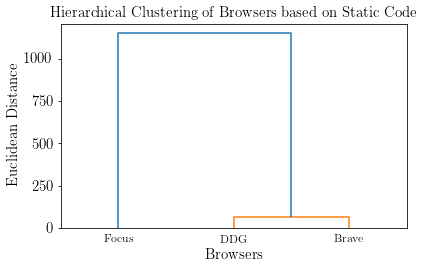

In [73]:
# X = data_arr

phone_labels=['iOS','Android']
browser_labels = ["DDG","Brave","Focus"]
# ref https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,labels=browser_labels, **kwargs)


# iris = load_iris()
# X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering of Browsers based on Static Code")
plt.xlabel("Browsers")
plt.ylabel("Euclidean Distance")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.tight_layout()
# plt.show()
# matplotlib.pyplot.gcf()
plt.savefig('./../plots/hierarchical_cluster_static_code.pdf')


In [30]:
model.distances_

array([  63.34824386, 1151.39639858])

Top features seen

In [32]:
def load_mapping():
    mapping = {}
    with open("/home/azafar2/mobile_analysis/fp_inspect/features_mapping.txt") as fp:
        file = fp.readlines()
        fp.close()
    for line in file:
        line = line.replace("\n","")
        identifier = line.split(",")[0]
        pair = line.split(",")[1]
        mapping[identifier] = pair
    return mapping

def load_important_feauture_mapping(mapping):
    important_feature_mappping = {}
    with open("/home/azafar2/mobile_analysis/fp_inspect/static_top_1K_features.txt") as fp:
        file = fp.readlines()
    for line in file:
        line = line.replace('\n','')
        important_feature_mappping[line] = mapping[line]
    return important_feature_mappping

important_feature_mappping = load_important_feauture_mapping(load_mapping())


In [41]:
def sort_dictionary(x):
    temp = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
    return temp
a = {}

ddg_features = sort_dictionary({important_feature_mappping[feat]:ddg[i] for i,feat in enumerate(important_feature_mappping)})
focus_features = sort_dictionary({important_feature_mappping[feat]:focus[i] for i,feat in enumerate(important_feature_mappping)})
brave_features = sort_dictionary({important_feature_mappping[feat]:brave[i] for i,feat in enumerate(important_feature_mappping)})
a = {
    "focus":focus_features,
    "brave":brave_features,
    "ddg_features":ddg_features
}


In [82]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df = pd.DataFrame(a)
df

,focus,brave,ddg_features
MemberExpression:window,4234,4225,4223
MemberExpression:length,4135,3970,3963
Identifier:length,4126,3959,3953
Literal:null,4068,3971,3965
MemberExpression:createElement,3998,4024,4023
...,...,...,...
MemberExpression:acceptCharset,0,0,0
ArrayExpression:CSS,0,0,0
Literal:addRange,0,0,0
SwitchCase:CSS,0,0,0


In [84]:
# common dissimilar scripts that were also identified as invasive fingerprinters
dissimilar_set = set()
with open("dissimilar_scripts.json") as fp:
    file = json.load(fp)
    fp.close()
_total = 0
_count = 0
for domain in file:
    for script in file[domain]:
        dissimilar_set.add(script)


with open("heuristic_per_script.json") as fp:
    file = json.load(fp)
    fp.close()
heuristics_set = set(file.keys())

common = (dissimilar_set.intersection(heuristics_set))
print(len(common))

54


In [80]:
print(_count/_total)

0.5854424855995811


{'https://amadeus.com/Battaine-of-now-But-him-Liuery-atten-It-is-speak',
 'https://beta.nj.gov/l-Y-Seyward-Hors-But-much-ther-Spirits-was-King-',
 'https://c.paypal.com/da/r/fb.js',
 'https://client.contents-search-windows.com/csw_cl_b.js?i=uwYldA1bnbWhkKnz',
 'https://dash.sparkloop.app/widget/MF218fb8b10e/embed.js',
 'https://data.allstate.com/529001/hen.js',
 'https://dias.bank.truist.com/ui/scripts/truist_common.js',
 'https://e.video-cdn.net/v2/embed.js',
 'https://epsf.ticketmaster.com/eps-d',
 'https://gettr.com/Medcing-of-deade-me-or-And-not-theeres-to-truct-',
 'https://kyfw.12306.cn/otn/HttpZF/GetJS',
 'https://m.bukalapak.com/p-ince-mine-meerebbleefe-Husbanied-wast-The-form',
 'https://m.globalsources.com/fides-a-Ser-Scons-he-Macb-Colme-Flamissiants-and',
 'https://mobile.southwest.com/assets/app/scripts/swa-common.js',
 'https://muckrack.com/muckrack/e8e7682d059ec37a2e020711a119175b',
 'https://nj.gov/Sprighter-a-newly-of-my-Louer-Entermittlemaine-I',
 'https://ping2.sport-